# Euro Daily Exchange Rates - 1999-2021

We will explore the daily Euro exchange rates between 1999 and 2021. The dataset is available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020).

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import seaborn as sns

%matplotlib inline

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [4]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


This dataset contains 5699 rows and 41 columns. Most of the values are stored as objects. The first column (Period\Unit) lists the date. Every other column gives the exchange rate for that day to 40 other currencies. Most of the exchanges rates have minimal missing data, with the exception of:

- Cypriot pound
- Estonian kroon
- Greek drachma
- Iceland krona
- Lithuanian litas
- Latvian lats
- Maltese liras
- Slovenian tolar
- Slovak koruna

The majority of these countries are currently in the EU and use the Euro, so we lose their exchange rate data when they switch.

## Clean Data

To clean the data, we do the following:
- We rename the ```US dollar``` and ```Period\Unit:``` columns to something easier to type — ```US_dollar``` and ```Time```.
- We change the Time column to a datetime data type.
- We sort the values by Time in ascending order.
- We reset the index (and drop the initial index).

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [7]:
#exchange_rates['Estonia_kroon'].value_counts(dropna=False)

In [6]:
euro_to_dollar = exchange_rates[['Time','US_dollar']]

In [7]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3373     6
          ..
1.1567     1
1.0483     1
1.2781     1
1.3045     1
1.5694     1
Name: US_dollar, Length: 3528, dtype: int64

In [8]:

euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

euro_to_dollar['US_dollar'].value_counts()


1.2276    9
1.1215    8
1.1305    7
1.1218    6
1.2713    6
         ..
1.1241    1
1.4501    1
1.1319    1
1.0894    1
0.8528    1
Name: US_dollar, Length: 3527, dtype: int64

In [9]:
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


### Rolling Mean

In [10]:
euro_to_dollar['rolling_mean_30'] = euro_to_dollar['US_dollar'].rolling(30).mean()

euro_to_dollar.head(5)

,Time,US_dollar,rolling_mean_30
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN


### Exchange Rate by US President and UK Prime Minister

Storytelling idea: show how the Euro-US dollar rate changed over the three previous presidents and five previous UK prime ministers.

- Bush (2001 - 2009)
- Obama (2009 - 2017)
- Trump (2017 - 2021)

- Blair (1997 - 2007)
- Brown (2007 - 2010)
- Cameron (2010 - 2016)
- May (2016 - 2019)
- Johnson (2019 - present)



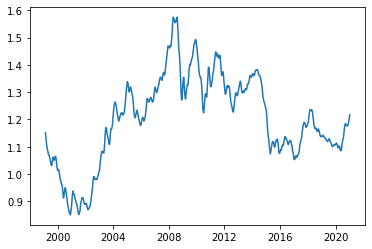

In [69]:
# visualze whole data set

plt.plot(euro_to_dollar['Time'],euro_to_dollar['rolling_mean_30'])
plt.show()

In [12]:
# select only the data related to the time periods in question
# Bush became president on Jan 20, 2000, so that will be our first date
# the dataset ends on Jan 8 2021, which is ~12 days before Trump left office
# we will let the dataset end their

presidents = euro_to_dollar[euro_to_dollar['Time'] > dt.datetime(2001, 1, 20)]

# create 3 separate dataframes for each president
bush = presidents[(presidents['Time'] >= dt.datetime(2001, 1, 20)) 
                 & (presidents['Time'] < dt.datetime(2009, 1, 20))]
obama = presidents[(presidents['Time'] >= dt.datetime(2009, 1, 20)) 
                 & (presidents['Time'] < dt.datetime(2017, 1, 20))]
trump = presidents[(presidents['Time'] >= dt.datetime(2017, 1, 20)) 
                 & (presidents['Time'] < dt.datetime(2021, 1, 8))]

bush.tail()

,Time,US_dollar,rolling_mean_30
2616,2009-01-13,1.3262,1.344990
2617,2009-01-14,1.3173,1.346477
2618,2009-01-15,1.3085,1.348067
2619,2009-01-16,1.3270,1.349977
2620,2009-01-19,1.3182,1.351840


In [41]:
trump.tail()

,Time,US_dollar,rolling_mean_30
5693,2020-12-31,1.2271,1.209623
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


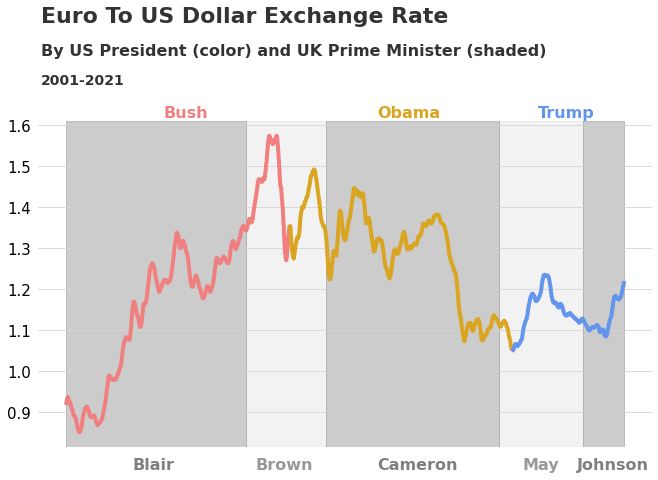

In [107]:
fig, ax = plt.subplots(figsize=(11,6))

ax.plot(bush['Time'],bush['rolling_mean_30'], color = 'lightcoral',
       linewidth=4)
ax.plot(obama['Time'],obama['rolling_mean_30'], color = 'goldenrod',
       linewidth=4)
ax.plot(trump['Time'],trump['rolling_mean_30'], color = 'cornflowerblue',
       linewidth=4)


for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
ax.tick_params(top=False, left=False, bottom=False)
ax.grid(axis='y',color='lightgray')
ax.set_xticklabels([])
ax.tick_params(axis='y', which='major', labelsize=15)

ax.text(11015, 1.85, 'Euro To US Dollar Exchange Rate', color='black', alpha=0.8,
       fontsize='22', weight='bold')
ax.text(11015, 1.77, 'By US President (color) and UK Prime Minister (shaded) ', color='black', alpha=0.8,
       fontsize='16', weight='bold')
ax.text(11015, 1.7, '2001-2021', color = 'black', alpha = 0.8, fontsize='14', weight='bold')

plt.axvspan(dt.datetime(2001, 1, 15), dt.datetime(2007, 6, 27), color='grey', alpha=0.4) # tony blair
plt.axvspan(dt.datetime(2007, 6, 27), dt.datetime(2010, 5, 11), color='grey', alpha=0.1) # gordon brown
plt.axvspan(dt.datetime(2010, 5, 11), dt.datetime(2016, 7, 13), color='grey', alpha=0.4) # david cameron
plt.axvspan(dt.datetime(2016, 7, 13), dt.datetime(2019, 7, 24), color='grey', alpha=0.1) # theresa may
plt.axvspan(dt.datetime(2019, 7, 24), dt.datetime(2021, 1, 7), color='grey', alpha=0.4) # boris johnson

ax.text(12215, 0.76, 'Blair', color = 'grey', alpha = 1, fontsize='16', weight='bold')
ax.text(13815, 0.76, 'Brown', color = 'grey', alpha = 0.8, fontsize='16', weight='bold')
ax.text(15415, 0.76, 'Cameron', color = 'grey', alpha = 1, fontsize='16', weight='bold')
ax.text(17315, 0.76, 'May', color = 'grey', alpha = 0.8, fontsize='16', weight='bold')
ax.text(18015, 0.76, 'Johnson', color = 'grey', alpha = 1, fontsize='16', weight='bold')

ax.text(12615, 1.62, 'Bush', color = 'lightcoral', fontsize='16', weight='bold')
ax.text(15415, 1.62, 'Obama', color = 'goldenrod', fontsize='16', weight='bold')
ax.text(17515, 1.62, 'Trump', color = 'cornflowerblue', fontsize='16', weight='bold')


plt.show()

### Year before joining EU

Now, let's examine how the exchange rates changed in the last year for countries joining the EU. 

The dataset runs from January 1999 until January 2021. From the EU website, here is the timeline of countries joining:

- January 5, 2004 - Czech Republic, Estonia, Cyprus, Latvia, Lithuania, Hungary, Malta, Poland, Slovakia, and Slovenia
- January 1, 2007 - Romania and Bulgaria
- January 7, 2013 - Croatia

Not all of these countries have adopted the Euro. These are the Czech Republic, 

Here is the mapping of country to column name
- Czech Republic : Czech koruna
- Estonia : Estonian kroon
- Cyprus : Cypriot pound
- Latvia : Latvian lats
- Lithuania : Lithuanian litas
- Hungary : Hungarian forint
- Malta : Maltese lira
- Poland : Polish zloty
- Slovakia : Slovak koruna
- Slovenia : Slovenian tolar
- Romania : Romanian leu
- Bulgaria : Bulgarian lev
- Croatia : Croatian kuna


Estonia has incomplete data, indicated by having a single, constant value. Therefore, we will drop Estonia from this analysis.

Poland, Bulgaria, and Lithuania are also missing data in the year before they joined, so we will exclude them as well.


In [14]:
exchange_rates.columns


Index(['Time', '[Australian dollar ]', '[Bulgarian lev ]', '[Brazilian real ]',
       '[Canadian dollar ]', '[Swiss franc ]', '[Chinese yuan renminbi ]',
       '[Cypriot pound ]', '[Czech koruna ]', '[Danish krone ]',
       '[Estonian kroon ]', '[UK pound sterling ]', '[Greek drachma ]',
       '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]',
       '[Indonesian rupiah ]', '[Israeli shekel ]', '[Indian rupee ]',
       '[Iceland krona ]', '[Japanese yen ]', '[Korean won ]',
       '[Lithuanian litas ]', '[Latvian lats ]', '[Maltese lira ]',
       '[Mexican peso ]', '[Malaysian ringgit ]', '[Norwegian krone ]',
       '[New Zealand dollar ]', '[Philippine peso ]', '[Polish zloty ]',
       '[Romanian leu ]', '[Russian rouble ]', '[Swedish krona ]',
       '[Singapore dollar ]', '[Slovenian tolar ]', '[Slovak koruna ]',
       '[Thai baht ]', '[Turkish lira ]', 'US_dollar',
       '[South African rand ]'],
      dtype='object')

#### Clean Data

To clean the data, we do the following:
- We rename each colum to ```country_unit```.
- We performa a rolling average of 15 to smooth out the data


In [15]:

old_names = ['[Czech koruna ]', '[Cypriot pound ]',
            '[Latvian lats ]', '[Hungarian forint ]',
            '[Maltese lira ]', '[Slovak koruna ]',
            '[Slovenian tolar ]', '[Romanian leu ]',
            '[Croatian kuna ]']

new_names = ['Czech_koruna', 'Cyprus_pound',
            'Latvia_lats', 'Hungary_forint',
            'Malta_lira', 'Slovakia_koruna',
            'Slovenia_tolar', 'Romania_leu',
            'Croatia_kuna']

date_joined = [dt.datetime(2004,1,5),
               dt.datetime(2004,1,5),
               dt.datetime(2004,1,5),
               dt.datetime(2004,1,5),
               dt.datetime(2004,1,5),
               dt.datetime(2004,1,5),
               dt.datetime(2004,1,5),
               dt.datetime(2007,1,1),
               dt.datetime(2013,1,7)
              ]


#- January 5, 2004 - Czech Republic, , Cyprus, Latvia, , 
#                    Hungary, Malta, , Slovakia, and Slovenia
#- January 1, 2007 - Romania and 
#- January 7, 2013 - Croatia


for old, new in zip(old_names, new_names):
    exchange_rates.rename(columns={old: new},
                      inplace=True)
    
#exchange_rates[rolling] = exchange_rates[new].rolling(15).mean()

    

#exchange_rates.columns

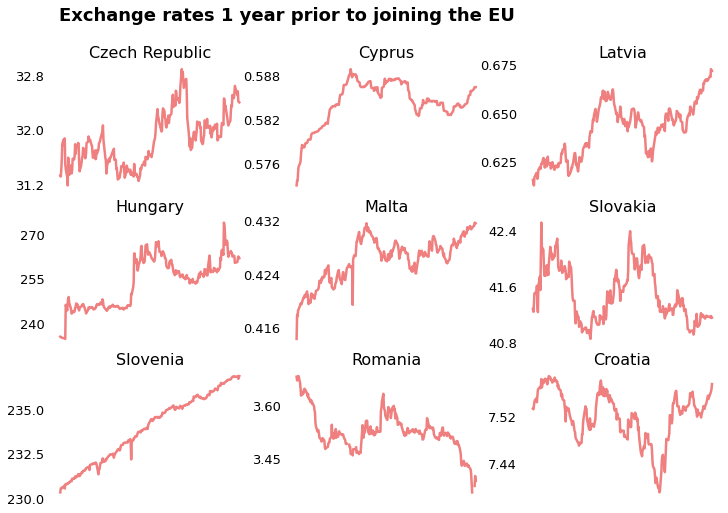

In [68]:

fig, axes = plt.subplots(ncols = 3, nrows = 3,
                        figsize=(12,8))

ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten() 

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7,
      ax8, ax9]


for ax, country, join_date in zip(ax_list, new_names, date_joined):
    
    # create a new dataframe with just times and rolling weekly average
    this_country = exchange_rates[['Time',country]]
    this_country = this_country[this_country[country] != '-']
    this_country[country] = this_country[country].astype(float)
    this_country['rolling_mean'] = this_country[country].rolling(7).mean()

    # use the date each country joined the EU to select only the data 
    # from the previous year
    year_before_join = join_date - dt.timedelta(days=365)

    this_country = this_country[(this_country['Time'] > year_before_join) & 
                                (this_country['Time'] < join_date)]
    
    #bush = presidents[(presidents['Time'] >= dt.datetime(2001, 1, 20)) 
    #             & (presidents['Time'] < dt.datetime(2009, 1, 20))]

    
    ax.plot(this_country['Time'],this_country[country],
            color='lightcoral',linewidth=2.5)
    ax.yaxis.set_major_locator(MaxNLocator(3)) 

    
    plot_title = country.split('_')
    if plot_title[0] == 'Czech':
        plot_title[0] = 'Czech Republic'
    ax.set_title(plot_title[0],fontsize=16)

    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
    ax.tick_params(top=False, left=False, bottom=False)
    #ax.grid(axis='y',color='lightgray')
    ax.set_xticklabels([])
    ax.tick_params(axis='y', which='major', labelsize=13)



#plt.plot(exchange_rates['Time'],exchange_rates['Czech_koruna'])
ax1.text(dt.datetime(2003,1,4),33.6,'Exchange rates 1 year prior to joining the EU',
        fontsize=18,weight='bold')
plt.show()